In [51]:
# Dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt

In [52]:
stats = pd.read_csv("Data/AdvancedStats.csv")
# mvp = mvp.drop("Table Name", axis = 1)
stats["PlayerName"] = stats["Player"].str.split("\\", n=1, expand=True)[0]
stats["PlayerID"] = stats["Player"].str.split("\\", n=1, expand=True)[1]
stats.drop("Player", axis = 1)
stats.fillna(0)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,season,PlayerName,PlayerID
0,1,Mark Acres\acresma01,C,27,ORL,80,1691,8.3,0.536,0.014,...,0.6,1.6,0.047,-3.1,-0.6,-3.7,-0.7,1989-90,Mark Acres,acresma01
1,2,Michael Adams\adamsmi01,PG,27,DEN,79,2690,15.4,0.542,0.437,...,2.5,6.9,0.124,1.8,-0.1,1.8,2.6,1989-90,Michael Adams,adamsmi01
2,3,Mark Aguirre\aguirma01,SF,30,DET,78,2005,15.8,0.544,0.104,...,2.5,5.7,0.136,1.0,0.0,1.0,1.5,1989-90,Mark Aguirre,aguirma01
3,4,Danny Ainge\aingeda01,PG,30,SAC,75,2727,16.1,0.528,0.250,...,2.1,4.8,0.085,1.2,-0.1,1.1,2.1,1989-90,Danny Ainge,aingeda01
4,5,Mark Alarie\alarima01,PF,26,WSB,82,1893,14.1,0.510,0.062,...,1.6,3.1,0.079,-0.6,-0.7,-1.3,0.3,1989-90,Mark Alarie,alarima01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17124,518,Thaddeus Young\youngth01,PF,31,CHI,64,1591,13.3,0.521,0.369,...,2.1,1.9,0.058,-1.4,0.2,-1.1,0.4,2019-20,Thaddeus Young,youngth01
17125,519,Trae Young\youngtr01,PG,21,ATL,60,2120,23.9,0.595,0.455,...,0.5,5.9,0.133,6.3,-2.3,4.0,3.2,2019-20,Trae Young,youngtr01
17126,520,Cody Zeller\zelleco01,C,27,CHO,58,1341,18.8,0.576,0.157,...,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5,2019-20,Cody Zeller,zelleco01
17127,521,Ante Žižić\zizican01,C,23,CLE,22,221,16.4,0.597,0.000,...,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1,2019-20,Ante Žižić,zizican01


In [53]:
cols = stats.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['PlayerID',
 'Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'season',
 'PlayerName']

In [54]:
cols = cols[-1:] + cols[:-1]
cols

['PlayerName',
 'PlayerID',
 'Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'season']

In [55]:
stats = stats[cols]
stats

,PlayerName,PlayerID,Rk,Player,Pos,Age,Tm,G,MP,PER,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,season
0,Mark Acres,acresma01,1,Mark Acres\acresma01,C,27,ORL,80,1691,8.3,...,9.4,1.1,0.6,1.6,0.047,-3.1,-0.6,-3.7,-0.7,1989-90
1,Michael Adams,adamsmi01,2,Michael Adams\adamsmi01,PG,27,DEN,79,2690,15.4,...,18.5,4.4,2.5,6.9,0.124,1.8,-0.1,1.8,2.6,1989-90
2,Mark Aguirre,aguirma01,3,Mark Aguirre\aguirma01,SF,30,DET,78,2005,15.8,...,24.3,3.1,2.5,5.7,0.136,1.0,0.0,1.0,1.5,1989-90
3,Danny Ainge,aingeda01,4,Danny Ainge\aingeda01,PG,30,SAC,75,2727,16.1,...,23.0,2.7,2.1,4.8,0.085,1.2,-0.1,1.1,2.1,1989-90
4,Mark Alarie,alarima01,5,Mark Alarie\alarima01,PF,26,WSB,82,1893,14.1,...,20.4,1.5,1.6,3.1,0.079,-0.6,-0.7,-1.3,0.3,1989-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17124,Thaddeus Young,youngth01,518,Thaddeus Young\youngth01,PF,31,CHI,64,1591,13.3,...,19.7,-0.2,2.1,1.9,0.058,-1.4,0.2,-1.1,0.4,2019-20
17125,Trae Young,youngtr01,519,Trae Young\youngtr01,PG,21,ATL,60,2120,23.9,...,34.9,5.4,0.5,5.9,0.133,6.3,-2.3,4.0,3.2,2019-20
17126,Cody Zeller,zelleco01,520,Cody Zeller\zelleco01,C,27,CHO,58,1341,18.8,...,20.8,2.4,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5,2019-20
17127,Ante Žižić,zizican01,521,Ante Žižić\zizican01,C,23,CLE,22,221,16.4,...,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1,2019-20


ValueError: array must not contain infs or NaNs

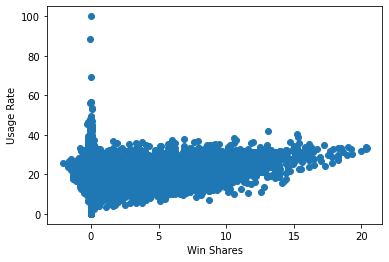

In [60]:
ws = stats.iloc[:,23]
usg = mvp.iloc[:,18]
plt.scatter(ws, usg)
plt.xlabel("Win Shares")
plt.ylabel("Usage Rate")
plt.show

correlation = st.pearsonr(ws, usg)
print(f"Correlation between Win Shares and Usage Rate is {correlation[0]}")
print(usg)

Correlation between Minutes and eFG% is 0.2935058853180998


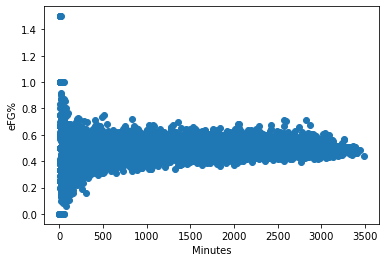

In [23]:
minutes = mvp.iloc[:,24]
efg = mvp.iloc[:,15]
plt.scatter(minutes,efg)
plt.xlabel("Minutes")
plt.ylabel("eFG%")
plt.show

correlation = st.pearsonr(minutes, efg)
print(f"Correlation between Minutes and eFG% is {correlation[0]}")

In [ ]:
minutes = mvp.iloc[:,24]
efg = mvp.iloc[:,15]
plt.scatter(minutes,efg)
plt.xlabel("Minutes")
plt.ylabel("eFG%")
plt.show

correlation = st.pearsonr(minutes, efg)
print(f"Correlation between Minutes and eFG% is {correlation[0]}")